## **Problem 1: Steganography Using Bit Plane Manipulation**

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# A.

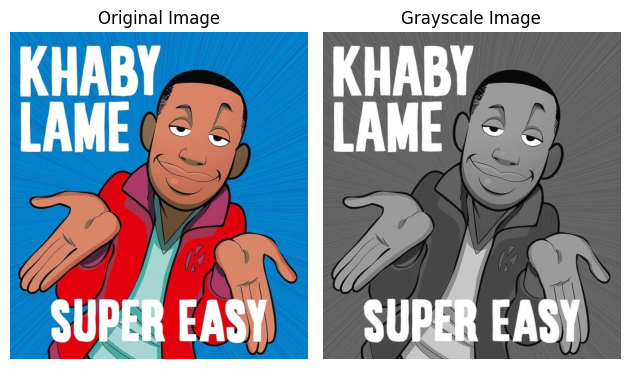

In [ ]:
image = cv2.imread('q1.jpg')

# Convert images to RGB and Grayscale
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap = 'gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

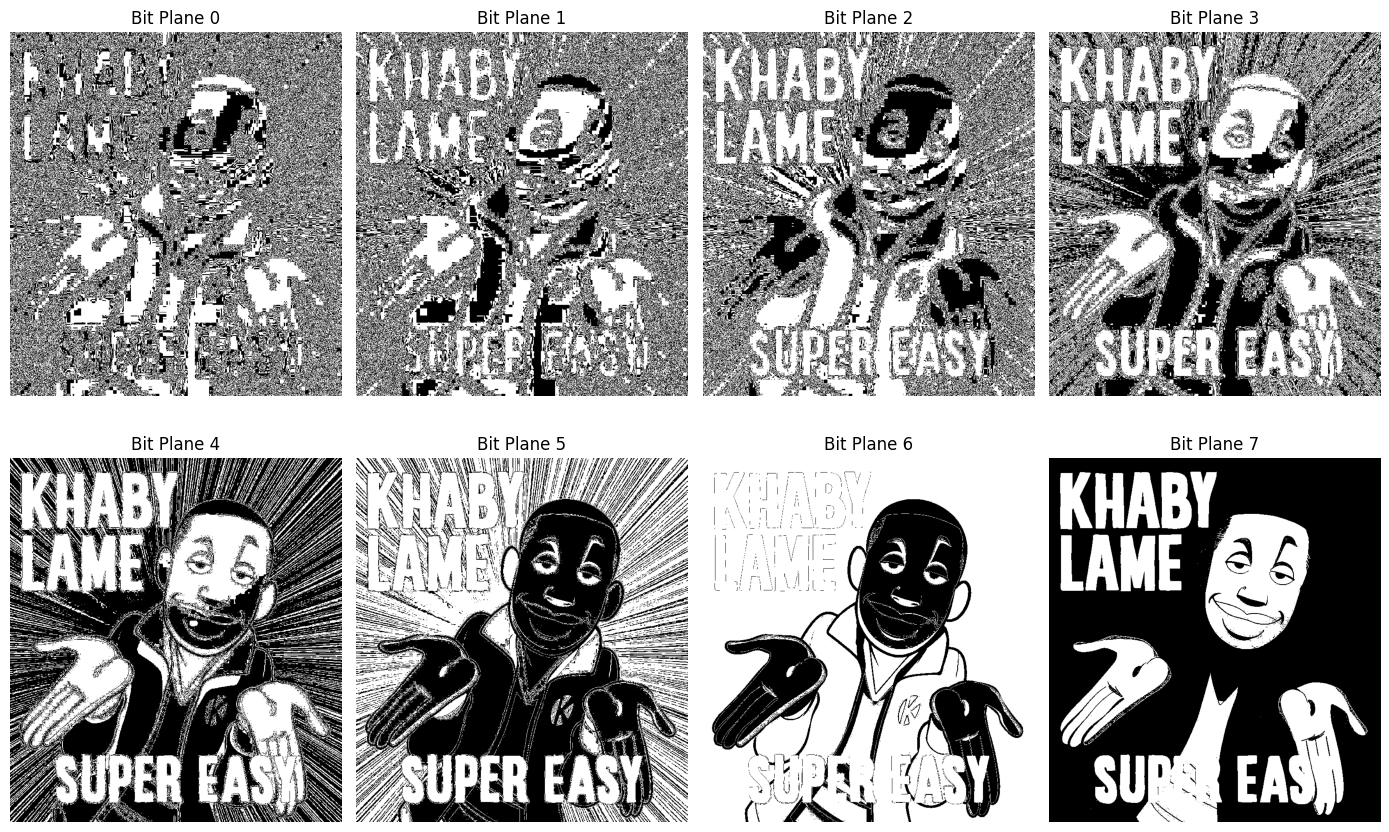

In [3]:
# Extracting bit planes
bit_planes = []
for bit in range(8):
    bit_planes.append((image >> bit) & 1)

plt.figure(figsize=(14, 9))
for bit in range(8):
    plt.subplot(2, 4, bit + 1)
    plt.imshow(bit_planes[bit], cmap='gray')
    plt.title(f'Bit Plane {bit}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# B.

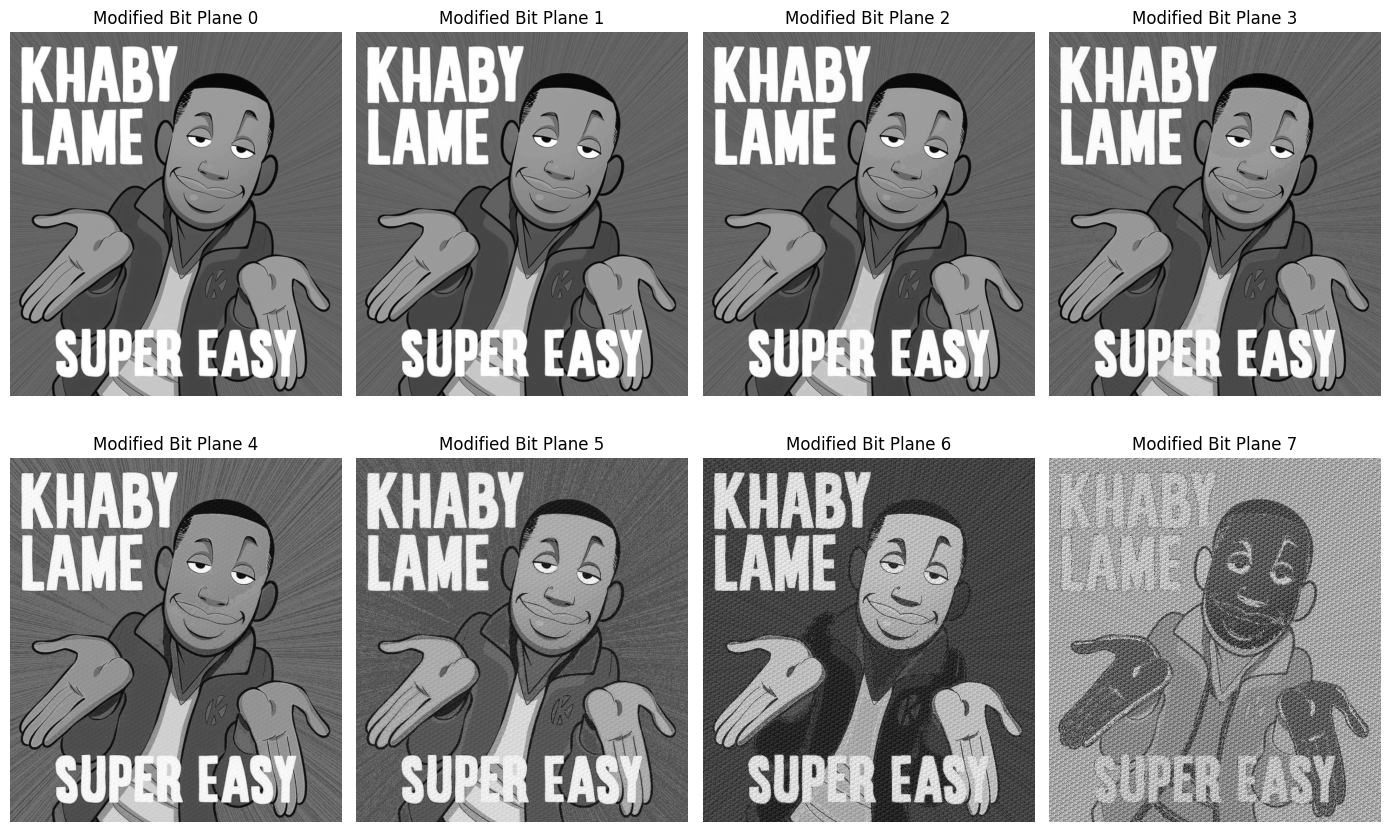

In [4]:
# Convert the full name to binary string and repeat it to match the image size
full_name = "hasan masroor"
binary_name = ''.join(format(ord(char), '08b') for char in full_name)  
binary_bits = np.tile(list(binary_name), (image.size // len(binary_name)) + 1)[:image.size]

plt.figure(figsize=(14, 9))

# XOR each bit plane with binary name pattern
for i in range(8):
    xor_bit_planes = (bit_planes[i] ^ binary_bits.reshape(image.shape).astype(np.uint8))
    modified_image = np.zeros_like(image, dtype=np.uint8)

    # Reconstruct image with modified bit plane
    for b in range(8):
        if b == i:
            modified_image += (xor_bit_planes << b)
        else:
            modified_image += (bit_planes[b] << b)
    
    plt.subplot(2, 4, i + 1)
    plt.imshow(modified_image, cmap='gray')
    plt.title(f'Modified Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# C.

In [5]:
# XOR bit plane with binary bits to extract hidden bits
modified_bit_plane = bit_planes[2] ^ binary_bits.reshape(image.shape).astype(np.uint8)
extracted_bits = (modified_bit_plane ^ bit_planes[2]).ravel()

# Convert extracted bits to binary string
binary_str = ''.join(str(bit) for bit in extracted_bits[:len(binary_name)])

# Convert binary string to hidden message
hidden_message = ''
for i in range(0, len(binary_str), 8):
    byte = binary_str[i:i+8]  
    hidden_message += chr(int(byte, 2))  

print("Extracted Binary:", binary_str)
print("Extracted Name:", hidden_message)

Extracted Binary: 01101000011000010111001101100001011011100010000001101101011000010111001101110010011011110110111101110010
Extracted Name: hasan masroor


# D.

In [6]:
# Convert the full name to binary string and repeat it to match the image size
full_name = "hasan masroor"
binary_name = ''.join(format(ord(char), '08b') for char in full_name)
binary_name += '00000000'  # End marker
binary_bits = np.tile(list(binary_name), (image.size // len(binary_name)) + 1)[:image.size]

In [7]:
def extract_hidden_message(modified_plane, original_plane):
    modified_bits = modified_plane.ravel()
    original_bits = original_plane.ravel()

    extracted_bits = []
    
    for i in range(0, len(modified_bits), 8): 
        # XOR between modified and original bits to get the hidden data
        xor_byte = modified_bits[i:i+8] ^ original_bits[i:i+8]
        byte_str = ''.join(str(bit) for bit in xor_byte)
        
         # Check for End marker
        if byte_str == '00000000': 
            break
        extracted_bits.append(byte_str)
    
    extracted_message = ''.join([chr(int(byte, 2)) for byte in extracted_bits])
    return extracted_message

# Extract hidden message from a modified bit plane
modified_bit_plane = bit_planes[4] ^ binary_bits.reshape(image.shape).astype(np.uint8)
hidden_message = extract_hidden_message(modified_bit_plane, bit_planes[4])
print("Extracted Name:", hidden_message)

Extracted Name: hasan masroor


# E.